In [7]:
!pip install geopandas

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


gdf = gpd.read_file(r"C:\Users\TRUE TECH\Downloads\sample.geojson")

print(gdf.head(5))

     osm_id  code       fclass                         name   ref oneway  \
0   9929693  5114    secondary   شارع دكتور على مصطفى مشرفه  None      F   
1  24228847  5115     tertiary  شارع الشهيد محمد السيد حنفى  None      F   
2  24450793  5114    secondary               ميدان عزبة سعد  None      F   
3  24662354  5122  residential                شارع ابن شجاع  None      B   
4  25185997  5112        trunk             طريق قناه السويس  None      F   

   maxspeed  layer bridge tunnel  ...    label  confidence  \
0         0      0      F      F  ...     none        0.95   
1         0      0      F      F  ...    crack        0.93   
2         0      0      F      F  ...     none        0.66   
3         0      0      F      F  ...    crack        0.80   
4         0      0      F      F  ...  pothole        0.63   

                image         lon        lat      x1      y1      x2      y2  \
0  image_29ead06c.jpg   -1.909644  72.458964  0.1672  0.2710  0.3152  0.5201   
1  image_b

In [9]:
cracks_df = gdf[gdf["label"] != "none"]

In [10]:
time_cracks = (
    cracks_df.groupby([pd.Grouper(key="timestamp", freq="h"), "label"])
    .size()
    .reset_index(name="count")
)

pivot_df = time_cracks.pivot(index="timestamp", columns="label", values="count").fillna(0)


<Figure size 1000x600 with 0 Axes>

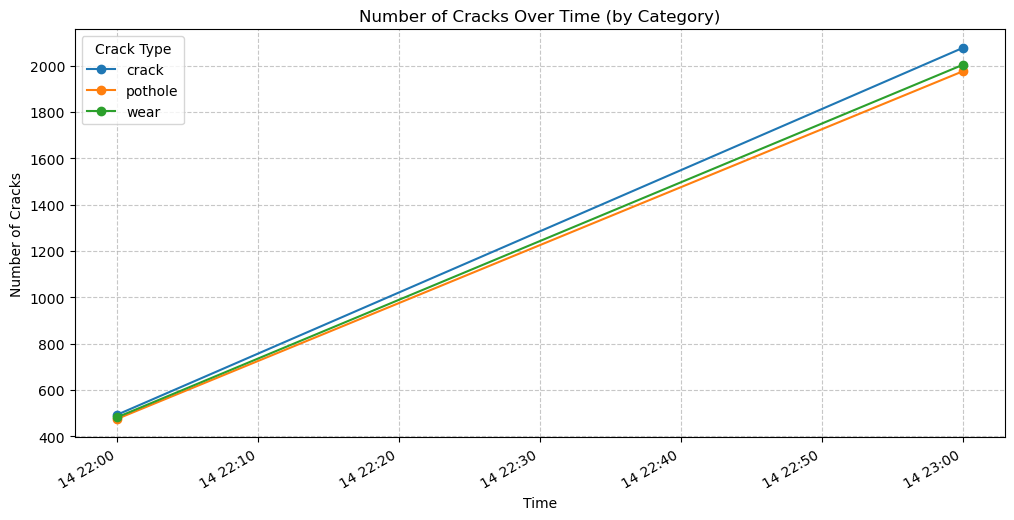

In [11]:
plt.figure(figsize=(10,6))
pivot_df.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Number of Cracks Over Time (by Category)")
plt.xlabel("Time")
plt.ylabel("Number of Cracks")
plt.legend(title="Crack Type")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

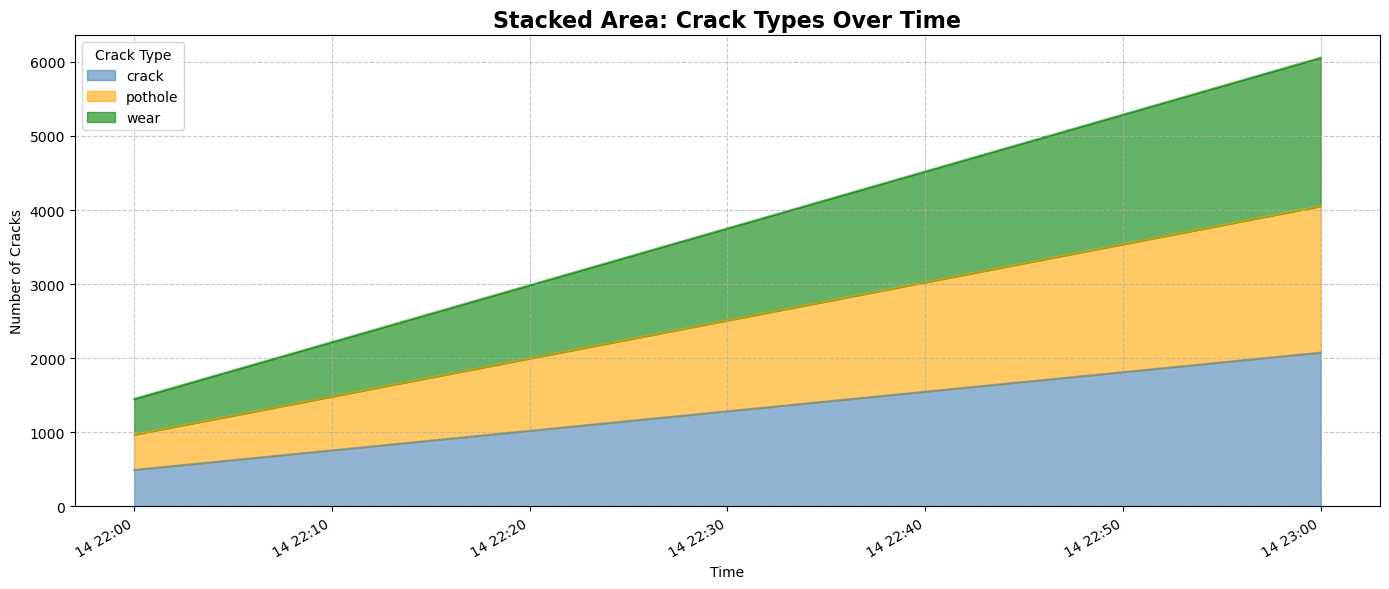

In [12]:
pivot_df.plot(
    kind="area",
    stacked=True,
    alpha=0.6,
    figsize=(14,6),
    color=[colors.get(col, "gray") for col in pivot_df.columns]
)
plt.title("Stacked Area: Crack Types Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Number of Cracks")
plt.legend(title="Crack Type")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
